In [36]:
from IPython.display import display
display({'text/html': '<h1>Topic8 Assignment</h1>', 'text/plain': 'Topic8 Assignment'}, raw=True)
display({'text/html': '<h1>Anoop Korappath</h1>', 'text/plain': 'Anoop Korappath'}, raw=True)
display({'text/html': '<h1>12/20/2021</h1>', 'text/plain': '12/20/2021'}, raw=True)


Topic8 Assignment

Anoop Korappath

12/20/2021

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

## Data Loading

In [38]:
# Load data
list_of_files = ['subject101.dat',
                 'subject102.dat',
                 'subject103.dat',
                 'subject104.dat',
                 'subject105.dat',
                 'subject106.dat',
                 'subject107.dat',
                 'subject108.dat',
                ]

subjectID = [1,2,3,4,5,6,7,8]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature',
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
           'handGyro1', 'handGyro2', 'handGyro3',
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature',
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
           'chestGyro1', 'chestGyro2', 'chestGyro3',
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature',
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [39]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
print(dataCollection.head())

   timestamp  activityID  heartrate  handTemperature  handAcc16_1  \
0       8.38           0      104.0             30.0      2.37223   
1       8.39           0        NaN             30.0      2.18837   
2       8.40           0        NaN             30.0      2.37357   
3       8.41           0        NaN             30.0      2.07473   
4       8.42           0        NaN             30.0      2.22936   

   handAcc16_2  handAcc16_3  handAcc6_1  handAcc6_2  handAcc6_3  ...  \
0      8.60074      3.51048     2.43954     8.76165     3.35465  ...   
1      8.56560      3.66179     2.39494     8.55081     3.64207  ...   
2      8.60107      3.54898     2.30514     8.53644     3.73280  ...   
3      8.52853      3.66021     2.33528     8.53622     3.73277  ...   
4      8.83122      3.70000     2.23055     8.59741     3.76295  ...   

   ankleGyro2  ankleGyro3  ankleMagne1  ankleMagne2  ankleMagne3  \
0    0.009250   -0.017580     -61.1888     -38.9599     -58.1438   
1   -0.004638   

## Data Cleaning

In [40]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns as they are not needed
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') #removal of non numeric data in cells
        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points

        return dataCollection

dataCol = dataCleaning(dataCollection)
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

dataCol.isnull().sum()

for i in range(0,4):
    dataCol["heartrate"].iloc[i]=100

dataCol.isnull().sum()

C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

## Exploratory Data Analysis

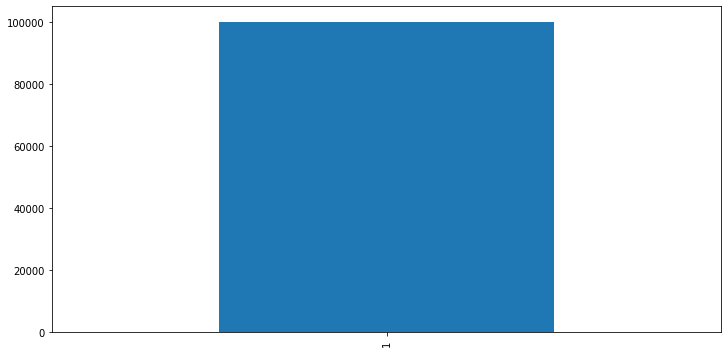

In [41]:
dataCol['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

In [42]:
train_df = dataCol.sample(frac=0.8, random_state=1)
test_df = dataCol.drop(train_df.index)

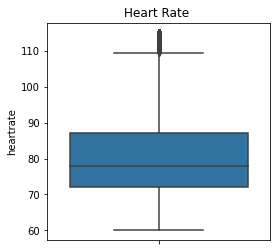

In [43]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=train_df["heartrate"])

<AxesSubplot:xlabel='activityID'>

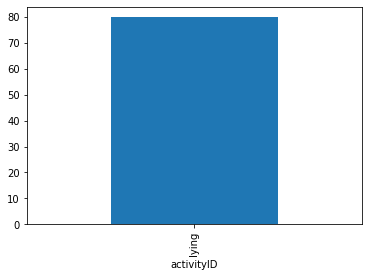

In [44]:
df_hr_act = train_df['heartrate'].groupby(train_df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

C:\Users\Anoops\AppData\Local\Temp/ipykernel_10020/2784983121.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


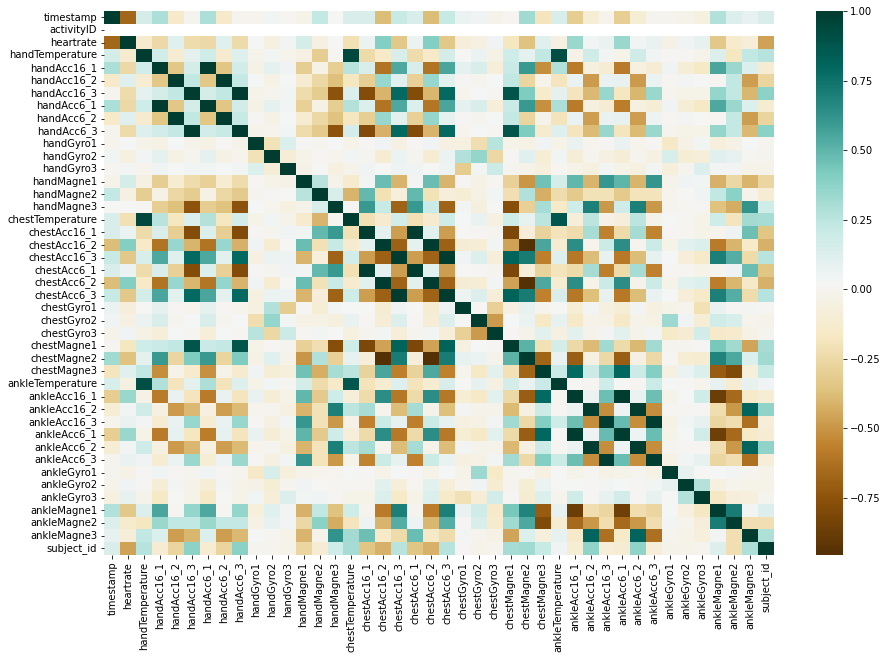

In [45]:
from pandas.plotting import scatter_matrix
df_corr = train_df.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()


In [46]:
train_df = train_df.drop(["timestamp", "subject_id"],1)

C:\Users\Anoops\AppData\Local\Temp/ipykernel_10020/1683004781.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df = train_df.drop(["timestamp", "subject_id"],1)


In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity
scaler = RobustScaler()
df_scaled = train_df.copy()
df_scaled_test = test_df.copy()

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
74774,1,0.466667,-1.116279,-0.772876,0.325627,0.887992,-0.797343,0.336158,0.696760,0.368636,...,-0.155383,-0.659325,0.041087,-0.157481,-0.092922,-0.067120,0.455806,0.323159,0.409606,-0.470270
17777,1,1.066667,0.046512,-2.004390,0.718673,-1.808131,-1.977769,0.700005,-1.893334,0.635275,...,0.540571,9.250092,1.121616,0.559376,0.790425,0.007065,-0.177394,-5.220350,-1.927955,17.514200
12048,1,0.533333,-0.767442,-0.162922,-1.360250,-6.445182,-0.183792,-1.321069,-6.660295,-1.229761,...,-1.643833,-0.867251,1.679278,-1.502598,-0.384975,-0.441231,-0.443815,-0.980922,-0.290919,12.230861
86125,1,0.400000,0.186047,-2.407072,-0.806931,-2.784826,-2.347814,-0.768982,-2.894412,-0.247789,...,0.395509,9.179216,1.294938,0.371705,0.647321,-0.801849,-1.209630,-3.462989,1.114372,-3.206017
6623,1,0.866667,-0.883721,0.188669,0.497120,-0.337784,0.149810,0.479504,-0.578801,-0.777399,...,-0.736693,-0.132351,0.207680,-0.719521,0.124034,0.606147,-0.172618,0.130635,1.713549,0.162294


In [48]:
X_train = df_scaled.drop('activityID', axis=1).values
y_train = df_scaled['activityID'].values

# Test Dataset
X_test = df_scaled.drop('activityID', axis=1).values
y_test = df_scaled['activityID'].values

## Dimensionality reduction using Principal Component Analysis(PCA)

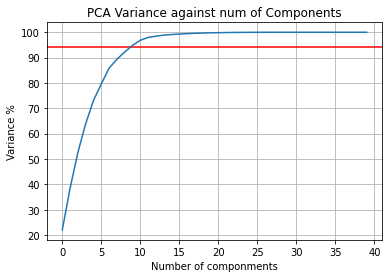

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Components")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

In [50]:
pca = PCA(n_components=17)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

## Decision Tree

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [54]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


In [55]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]



## Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [57]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


In [58]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)


Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]



## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [60]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


In [61]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]



## AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier()

In [63]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


In [64]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]



## AdaBoost + RandomForest

In [65]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [66]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


In [67]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]



## XGBoost

In [68]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, y_train.ravel())

[12:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]



C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anoops\PycharmProjects\pythonProject\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


In [70]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     80030

    accuracy                           1.00     80030
   macro avg       1.00      1.00      1.00     80030
weighted avg       1.00      1.00      1.00     80030


Confusion Matrix: 
 [[80030]]

